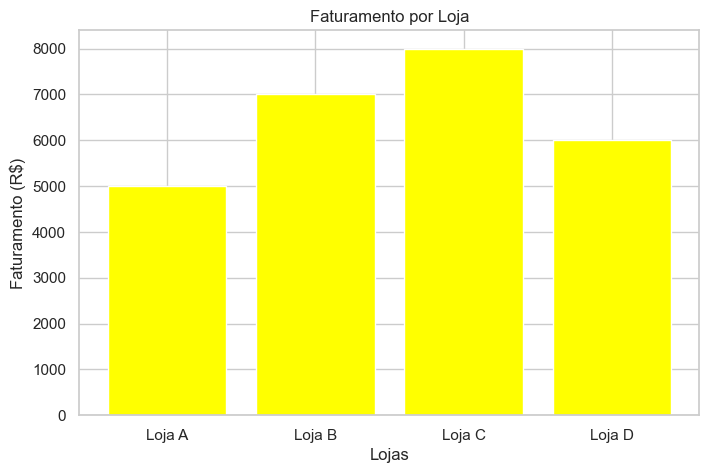

In [9]:
import matplotlib.pyplot as plt

# Dados de exemplo
lojas = ["Loja A", "Loja B", "Loja C", "Loja D"]
faturamento = [5000, 7000, 8000, 6000]

# Criar gráfico
plt.figure(figsize=(8, 5))
plt.bar(lojas, faturamento, color="yellow")

# Títulos e rótulos
plt.title("Faturamento por Loja")
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")

# Mostrar gráfico
plt.show()


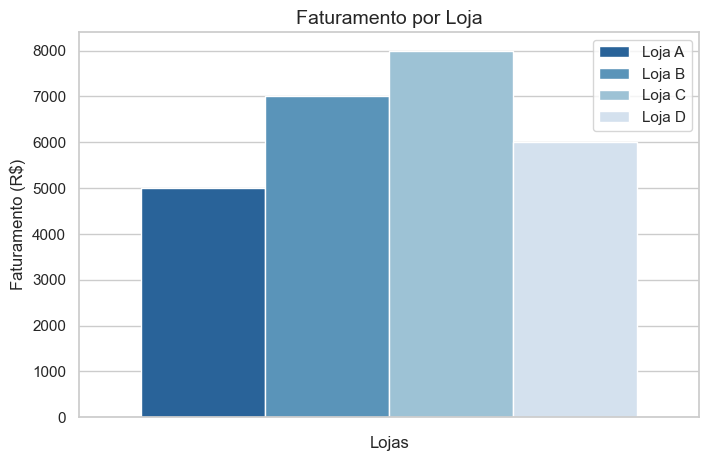

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo do Seaborn
sns.set_theme(style="whitegrid")

# Criar gráfico com Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(hue=lojas, y=faturamento, palette="Blues_r")

# Títulos e rótulos
plt.title("Faturamento por Loja", fontsize=14)
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")

# Mostrar gráfico
plt.show()


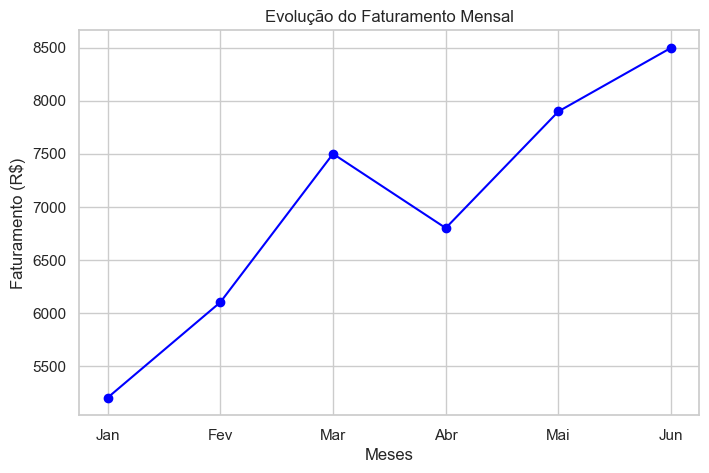

In [11]:
# Dados de exemplo: Faturamento ao longo de 6 meses
meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun"]
faturamento = [5200, 6100, 7500, 6800, 7900, 8500]


# Matplotlib - Gráfico de Linha
plt.figure(figsize=(8, 5))
plt.plot(meses, faturamento, marker="o", linestyle="-", color="blue")

plt.title("Evolução do Faturamento Mensal")
plt.xlabel("Meses")
plt.ylabel("Faturamento (R$)")
plt.grid(True)

plt.show()

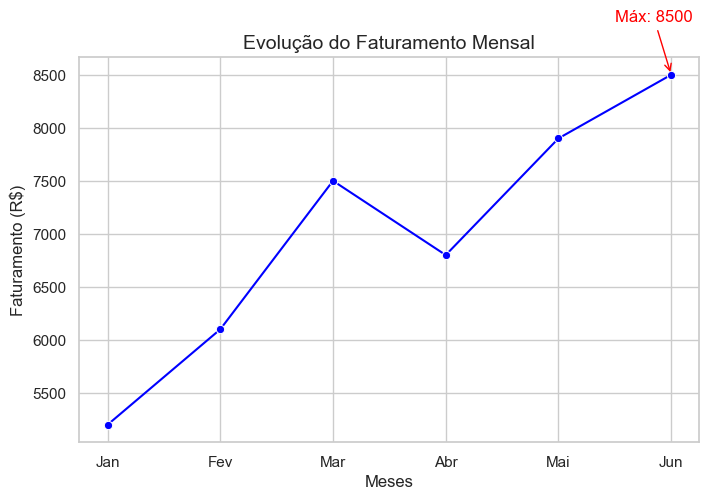

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo: Faturamento ao longo de 6 meses
meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun"]
faturamento = [5200, 6100, 7500, 6800, 7900, 8500]

# Identificar o maior faturamento e o mês correspondente
max_faturamento = max(faturamento)
max_index = faturamento.index(max_faturamento)
mes_max = meses[max_index]

# Criar gráfico Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(x=meses, y=faturamento, color="blue", marker="o")

# Adicionar anotação no pico de faturamento
plt.annotate(f"Máx: {max_faturamento}",
             xy=(mes_max, max_faturamento),
             xytext=(max_index - 0.5, max_faturamento + 500),  # Ajuste a posição do texto
             arrowprops=dict(arrowstyle="->", color="red"),
             fontsize=12, color="red")

# Configurações do gráfico
plt.title("Evolução do Faturamento Mensal", fontsize=14)
plt.xlabel("Meses")
plt.ylabel("Faturamento (R$)")
plt.show()


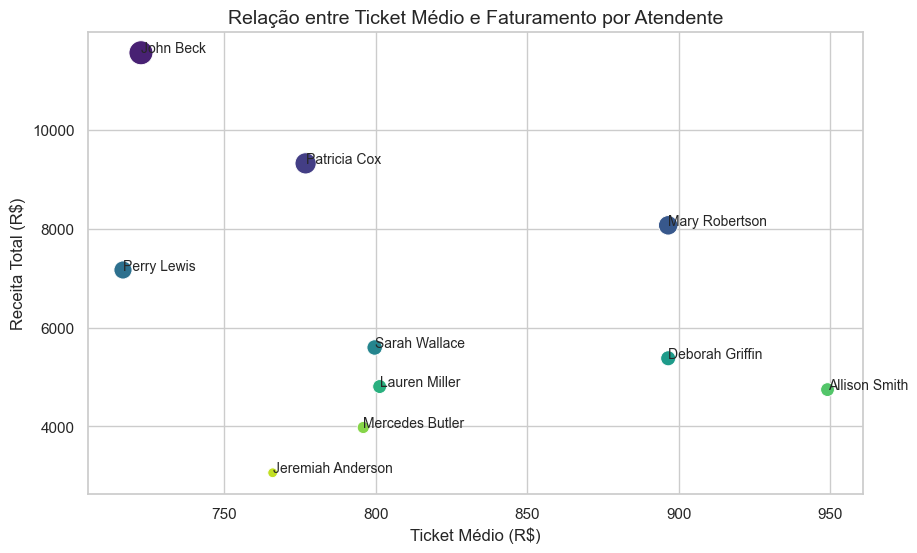

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from classes.classanaliseatendentes import AnaliseAtendentes
from classes.classdatabasemanager import DatabaseManager
from utils.merge_tabelas import merge_tabelas

# Criar conexão com o banco
db_manager = DatabaseManager()
analise_atendentes = AnaliseAtendentes(db_manager)

# Obter dados processados
df_atendentes = analise_atendentes.atendentes_ticket_medio_venda()
df_faturamento_atendente = analise_atendentes.atendentes_mais_faturaram()


# Unir os DataFrames para ter Ticket Médio + Receita Total
df_merged = pd.merge(df_atendentes, df_faturamento_atendente, on="Atendente", how="outer")


# Garantir que não há colunas duplicadas após o merge
df_merged.rename(columns={"Receita Total_x": "Receita Total"}, inplace=True)

df_merged = df_merged.sort_values(by="Receita Total", ascending=False).head(10)


# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_merged,
    x="Ticket Médio",
    y="Receita Total",
    hue="Atendente",  # Cores diferentes para cada atendente
    size="Receita Total",
    sizes=(50, 300),
    palette="viridis",
    legend=False  # 🔴 Remove a legenda automática gerada pelo Seaborn
)

# Adicionar os nomes dos atendentes nos pontos do gráfico
for _, row in df_merged.iterrows():
    plt.text(row["Ticket Médio"], row["Receita Total"], row["Atendente"], fontsize=10, ha="left")

# Adicionar títulos e rótulos
plt.title("Relação entre Ticket Médio e Faturamento por Atendente", fontsize=14)
plt.xlabel("Ticket Médio (R$)", fontsize=12)
plt.ylabel("Receita Total (R$)", fontsize=12)

# Exibir gráfico
plt.show()



C:\Users\Tuta\AppData\Local\Temp\ipykernel_1728\3496738235.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_vendas_atendentes["Atendente"], y=df_vendas_atendentes["Quantidade"], palette="coolwarm")


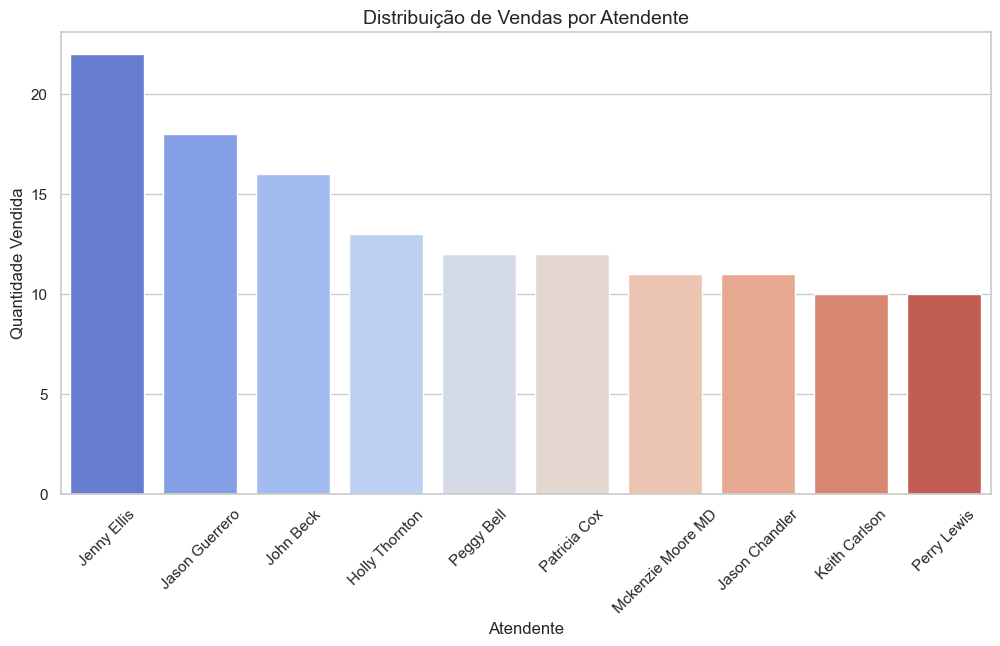

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from classes.classanaliseatendentes import AnaliseAtendentes
from classes.classdatabasemanager import DatabaseManager

# Criar conexão com o banco
db_manager = DatabaseManager()
analise_atendentes = AnaliseAtendentes(db_manager)

# Obter dados de vendas por atendente
df_vendas_atendentes = analise_atendentes.atendentes_mais_venderam()

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=df_vendas_atendentes["Atendente"], y=df_vendas_atendentes["Quantidade"], palette="coolwarm")

# Configurações do gráfico
plt.xticks(rotation=45)
plt.xlabel("Atendente")
plt.ylabel("Quantidade Vendida")
plt.title("Distribuição de Vendas por Atendente", fontsize=14)

# Exibir gráfico
plt.show()


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from classes.classanaliseatendentes import AnaliseAtendentes
from classes.classdatabasemanager import DatabaseManager

# Criar conexão com o banco
db_manager = DatabaseManager()
analise_atendentes = AnaliseAtendentes(db_manager)

# Obter dados de vendas por atendente ao longo do tempo
df_vendas_tempo = analise_atendentes.evolucao_vendas_por_atendente()
df_vendas_tempo["Data"] = pd.to_datetime(df_vendas_tempo["Data"]).dt.strftime("%Y-%m")





       Data         Atendente  Receita Total
0   2024-01  Kathryn Matthews         616.41
1   2024-01     Angela Willis        1361.82
2   2024-03   Deborah Griffin        5379.48
3   2024-06      Patricia Cox        2617.70
4   2024-06    Katherine West         680.54
5   2024-07    Jason Guerrero        2687.20
6   2024-08       Joseph Hall        1074.88
7   2024-09    Mary Robertson        8069.22
8   2024-10     Robert Miller         786.24
9   2024-12       Jenny Ellis         761.28
10  2024-12     Robert Miller        1047.08
